- By: Alex Kwon
- Email: alex.kwon [at] hudsonthames [dot] org

# Online Portfolio Selection - Pattern Matching

## OLPS Strategies

[**Benchmarks**](https://github.com/hudson-and-thames/research/blob/master/Online%20Portfolio%20Selection/Introduction%20to%20Online%20Portfolio%20Selection.ipynb)

[**Momentum**](https://github.com/hudson-and-thames/research/blob/master/Online%20Portfolio%20Selection/Online%20Portfolio%20Selection%20-%20Momentum.ipynb)

[**Mean Reversion**](https://github.com/hudson-and-thames/research/blob/master/Online%20Portfolio%20Selection/Online%20Portfolio%20Selection%20-%20Mean%20Reversion.ipynb)

[**Pattern Matching**](https://github.com/hudson-and-thames/research/blob/master/Online%20Portfolio%20Selection/Online%20Portfolio%20Selection%20-%20Pattern%20Matching.ipynb)

## Abstract

Pattern matching locates similarly acting historical market windows and make future predictions based on the similarity. Traditional quantitative strategies such as momentum and mean reversion focus on the directionality of the market trends. The underlying assumption that the immediate past trends will continue is simple but does not always perform the best in real markets. Pattern matching strategies combine the strengths of both by exploiting the statistical correlations of the current market window to the past.

In the following notebook, we will examine various Correlation Driven Nonparametric Strategies. Using the Pearson correlation coefficient as a threshold for similarity, CORN identifies similar periods to maximize returns for the contained set.

Symmetric and Functional CORN strategies are further extensions that not only look at similar periods but also inversely correlated periods. As markets tend to have symmetric properties, using both ends of the correlation improves these strategies to maximize returns for similarly performing one but also reduce drawdowns for anticorrelated periods.

Further on, we will examine a further improvement of these strategies by using the top-K selection process for the universal portfolio. By selecting the top-K best-performing strategies each period, the universal portfolio employs an ensemble method that reduces variability and can effectively choose the strategy with the highest returns.


**1. Correlation Driven Nonparametric Learning**
   - CORN
   - CORN-U
   - CORN-K
   
**2. Symmetric Correlation Driven Nonparametric Learning**
   - SCORN
   - SCORN-K

**3. Functional Correlation Driven Nonparametric Learning**
   - FCORN
   - FCORN-K
    
**4. Data Exploration**

## 1. Correlation Driven Nonparametric Learning

### 1.1 Correlation Driven Nonparametric Learning (CORN)

Correlation Driven Nonparametric Learning strategies look at historical market sequences to identify similarly correlated periods. Existing pattern matching strategies attempt to exploit and identify the correlation between different market windows by using the Euclidean distance to measure the similarity between two market windows. However, the traditional Euclidean distance between windows does not effectively capture the linear relation. CORN utilizes the Pearson correlation coefficient instead of Euclidean distances to capture the whole market direction.

CORN formally defines a similar set to be one that satisfies the following equation:

$C_t(w,\rho) = \left\lbrace w < i < t+1 \bigg\vert \frac{cov(x^{i-1}_{i-w}, x^t_{t-w+1})}{std(x^{i-1}_{i-w})std(x^t_{t-w+1})} \geq \rho\right\rbrace$

W represents the number of windows to lookback, and $\rho$ is the correlation coefficient threshold.

For the specific correlation calculation, each market window of w periods is concatenated to obtain a univariate correlation coefficient between the two windows.

Once all the similar historical periods are identified, the strategy returns weights that will maximize returns for the period. 

$b_{t+1}(w,\rho) = \underset{b \in \Delta_m}{\arg \max} \underset{i \in C_t(w,\rho)}{\prod}(b \cdot x_i)$

### 1.2 Correlation Driven Nonparametric Learning - Uniform (CORN-U)

Because the CORN strategies are dependent on the parameters, we propose a more generic one that takes an ensemble approach to reduce variability. One possible CORN ensemble is the CORN-U method.

CORN-U generates a set of experts with different window sizes and the same $\rho$ value. After all the expert's weights are calculated, weights are evenly distributed among all experts to represent the strategy as a universal portfolio.

After gathering results for all the experts, the total portfolio weight will be determined by:

$b_{t+1}=\frac{\sum_{w, \rho}q(w,\rho)S_t(w,\rho)b_{t+1}(w,\rho)}{\sum_{w, \rho}q(w,\rho)S_t(w,\rho)}$

### 1.3 Correlation Driven Nonparametric Learning - K (CORN-K)

CORN-K further improves the CORN-U by generating more parameters of experts. There is more variability as different ranges of window and $\rho$ value are considered to create more options.

The most important part of the CORN-K, however, is the capital allocation method. Unlike CORN-U, which uniformly distributes capital among all the experts, CORN-K selects the top-k best performing experts until the last period and equally allocate capital among them. This prunes the experts that have less optimal returns and puts more weight on the performing ones.

CORN-K takes in 3 parameters: window, rho, and k.

## 2. Symmetric Correlation Driven Nonparametric Learning (SCORN)

Market symmetry is a concept that the markets have mirrored price movements. Increasing price trends represents a mirror of a decreasing trend. This gives us an intuitional understanding that if the price movements are strongly negatively correlated, the optimal portfolio weights should minimize the returns or the losses from those periods as it is most likely that the optimal portfolio weights would be the inverse.

Introduced recently in a Journal of Financial Data Science paper by Yang Wang and Dong Wang in 2019, SCORN identifies positively correlated windows and negatively correlated windows.

The positiviely correlated windows are identified similar to the process for CORN.

$C(x_t;w,\rho) = \lbrace x_j \vert R(X^{j-1}_{j-2},X^{t-1}_{t-w})  > \rho)$

And the negatively correlated windows are identified as any period with a correlation value below the negative of the threshold.

$C'(x_t;w,\rho) = \lbrace x_j \vert R(X^{j-1}_{j-2},X^{t-1}_{t-w})  < -\rho)$

The strategy, therefore, maximizes the returns for periods that are considered similar and minimize the losses over periods that are considered the opposite.

$b^{\bf{\star}}_t(w,\rho) = \underset{b \in \Delta_m}{\arg\max} \underset{x \in C(x_t;w,\rho)}{\sum}\log b^{\top}x - \underset{x \in C'(x_t;w,\rho)}{\sum}\log b^{\top}x$

## 3. Functional Correlation Driven Nonparametric Learning (FCORN)

FCORN further extends the SCORN by introducing a concept of an activation function. Applying the concept to the previous CORN algorithms, the activation function for the SCORN can be considered as a piecewise function. For any value between the positive and negative value of the threshold, we discount the importance of the period by placing a constant of 0.

Instead of completely neglecting windows with correlation with absolute value less than the threshold, FCORN introduces a sigmoid function that places a set of different weights depending on the correlation to the current market window. By replacing with such a variable, it is possible for us to place different importance on the correlated periods. One that has higher correlation will have higher weights of importance whereas ones that are less correlated will have less importance on it.

The activation function can be labeled as the following:

$b^{\bf{\star}}_t(w,\rho) = \underset{b \in \Delta_m}{\arg\max} \underset{j \in \lbrace1,...,t-1\rbrace}{\sum}v(j)\log b^{\top}x_i$

If the correlation is nonnegative, we place a positive weight.

$\text{if} \: c \geq 0 \rightarrow v(j) =  \frac{1}{1 + \exp(-\lambda(c-\rho))}$

If the correlation is negative, we place a negative weight that approaches 0 for correlation values closer to 0.

$\text{if} \: c < 0 \rightarrow v(j) =  \frac{1}{1 + \exp(-\lambda(c+\rho))} - 1$

In [368]:
import pandas as pd
import numpy as np
import pickle
import optuna
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.io as pio
from plotly.subplots import make_subplots 
from mlfinlab.online_portfolio_selection import *
pio.renderers.default = "svg" # Toggle for GitHub rendering

## Import Data

More information on these datasets is available [here](https://github.com/hudson-and-thames/research/blob/master/Online%20Portfolio%20Selection/Data%20Selection.ipynb).

In [307]:
msci = pd.read_csv('data/MSCI.csv', parse_dates=True, index_col='Date').dropna()[1:]
us_equity = pd.read_csv('data/US_Equity.csv', parse_dates=True, index_col='Date')
djia = pd.read_csv('data/DJIA.csv', parse_dates=True, index_col='Date')
nyse = pd.read_csv('data/NYSE.csv', parse_dates=True, index_col='Date')
sp500 = pd.read_csv('data/SP500.csv', parse_dates=True, index_col='Date')
tse = pd.read_csv('data/TSE.csv', parse_dates=True, index_col='Date')

## 5.1 NYSE: 1961-1984

In [308]:
# Load Optuna Study.
nyse_corn = optuna.load_study(study_name='corn', storage='sqlite:///stored/nyse.db')
nyse_cornu = optuna.load_study(study_name='cornu', storage='sqlite:///stored/nyse.db')
nyse_scorn = optuna.load_study(study_name='scorn', storage='sqlite:///stored/nyse.db')
nyse_fcorn = optuna.load_study(study_name='fcorn', storage='sqlite:///stored/nyse.db')

### CORN

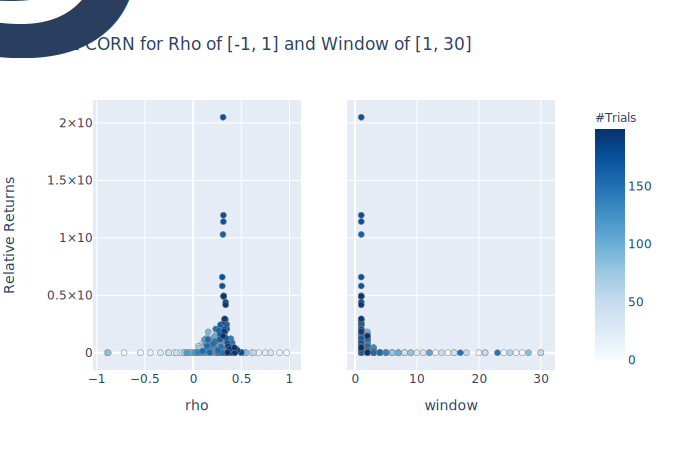

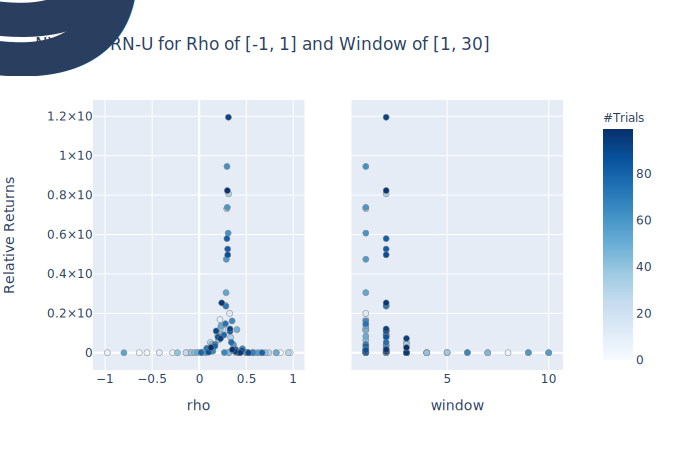

In [369]:
# NYSE CORN
fig = optuna.visualization.plot_slice(nyse_corn)
fig.update_layout(title_text="NYSE CORN for Rho of [-1, 1] and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

# NYSE CORN-U
fig = optuna.visualization.plot_slice(nyse_cornu)
fig.update_layout(title_text="NYSE CORN-U for Rho of [-1, 1] and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

There is an overwhelming concentration of parameters near a window of 1, which indicates that these pattern-matching strategies perform the best for a single period window. The optimal value of rho was near 0.4, and interestingly, we can see that returns are primarily dependent on the window length. It is certainly possible to reach extremely high returns with the right parameters, but a rho range between 0.2 and 0.4 was adequate for the most parts.

### CORN-K

In [182]:
# Pickled study for various CORN-K parameters.
with open('pickled/nyse_cornk.pickle', 'rb') as f:
    nyse_cornk = pickle.load(f)
nyse_cornk = pd.DataFrame(nyse_cornk, columns=['Window','Rho','K','Returns']).sort_values('Returns', ascending=False)

In [183]:
nyse_cornk.head()

Window  Rho    K       Returns
3       1.0  3.0  1.0  6.134229e+13
79      3.0  5.0  5.0  5.766608e+13
78      3.0  5.0  4.0  5.538836e+13
21      2.0  3.0  1.0  4.810431e+13
134     4.0  5.0  5.0  4.797495e+13

In [311]:
# Created a simple plotting function to declutter the notebook.
def plot_k(data, title):
    fig = go.Figure(data=[go.Scatter3d(x=data['Window'], y=data['Rho'], z=data['K'], mode='markers',
    marker=dict(size=8, color=data['Returns'], colorscale='blues', opacity=0.7))])

    fig.update_layout(scene=dict(xaxis=dict(title_text='Window', tick0=1, dtick=1),
                                 yaxis=dict(title_text='Rho', tick0=1, dtick=1),
                                 zaxis=dict(title_text='K', tick0=0, dtick=5)))
    camera = dict(up=dict(x=-1, y=-1, z=1), center=dict(x=0, y=0, z=0), eye=dict(x=-1.6, y=-1.6, z=1.05))
    fig.update_layout(scene_camera=camera, title=title)
    fig.show()

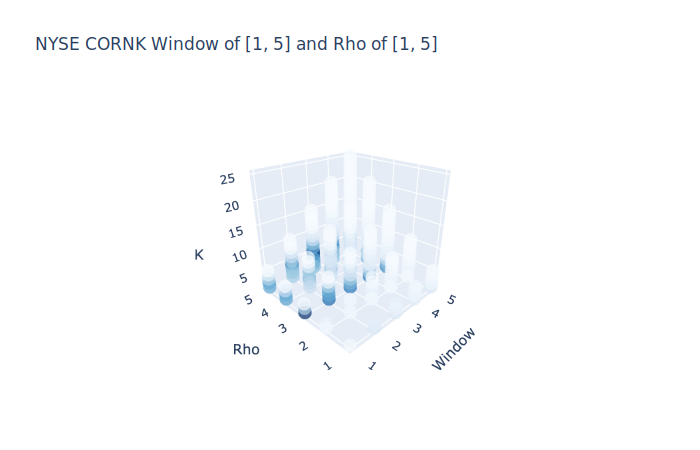

In [370]:
plot_k(nyse_cornk, "NYSE CORNK Window of [1, 5] and Rho of [1, 5]")

In [184]:
# NYSE CORN-K with highest returns.
nyse_cornk_ = CORNK(window=1, rho=3, k=1)
nyse_cornk_.allocate(nyse, verbose=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


For the CORN-K, darker colors indicate higher returns. This ensemble strategy is primarily dependant on a low k value. The highest returns are from a window of 1 and rho of 3. This is in line with our CORN analysis that NYSE had a pattern matching the trend for a single period window, and rho of 3 covered value of $\frac{1}{3}$, which is in range of the original optimal rho value.

### SCORN

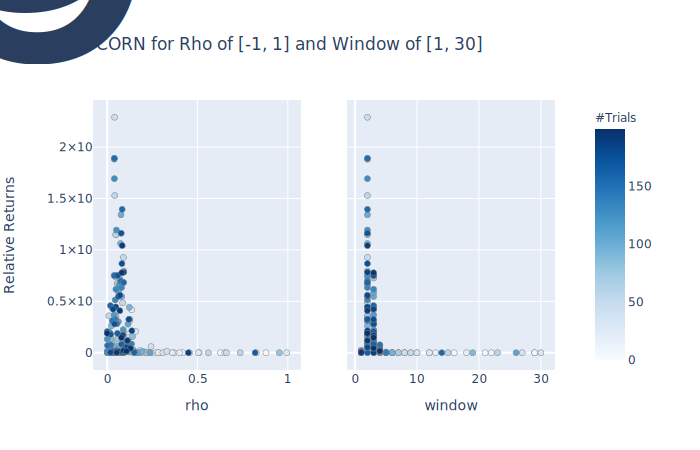

In [371]:
# NYSE SCORN
fig = optuna.visualization.plot_slice(nyse_scorn)
fig.update_layout(title_text="NYSE SCORN for Rho of [-1, 1] and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

The SCORN algorithm actually provides a binary classification for the correlation threshold. Because the optimal rho is close to 0, the strategy indicates an activation function of 1 for correlated periods and -1 for inversely correlated periods. The market window is also slightly longer for SCORN as we see a price trend with a period of 2 corresponding to the highest returns.

### SCORN-K

In [186]:
# Pickled study for NYSE SCORN-K parameters.
with open('pickled/nyse_scornk.pickle', 'rb') as f:
    nyse_scornk = pickle.load(f)
nyse_scornk = pd.DataFrame(nyse_scornk, columns=['Window','Rho','K','Returns']).sort_values('Returns', ascending=False)

In [187]:
nyse_scornk.head()

Window  Rho    K       Returns
65     3.0  4.0  3.0  1.882506e+15
49     3.0  2.0  2.0  1.484575e+15
93     4.0  1.0  4.0  1.435646e+15
47     3.0  1.0  3.0  1.397954e+15
28     2.0  4.0  2.0  1.360741e+15

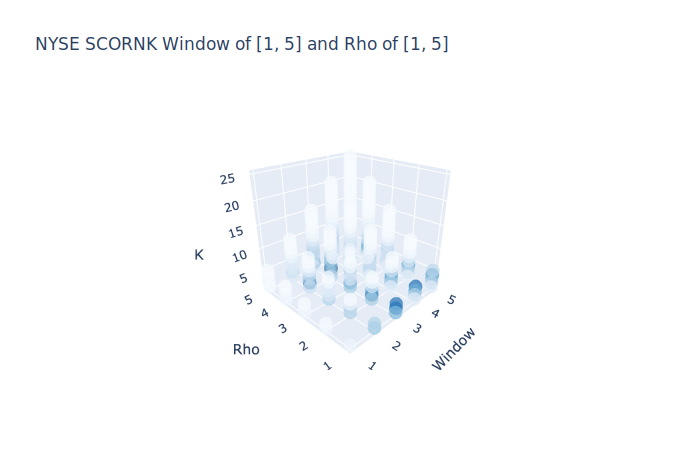

In [372]:
plot_k(nyse_scornk, "NYSE SCORNK Window of [1, 5] and Rho of [1, 5]")

In [49]:
# NYSE SCORN-K with highest returns.
nyse_scornk_ = SCORNK(window=3, rho=4, k=3)
nyse_scornk_.allocate(nyse, verbose=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


Looking at the SCORN-K graph, we notice that a longer window was more optimal for SCORN, which is in line with our SCORN analysis. Because a lower rho and slightly longer window had higher returns, we see that the window of 3 and rho of 1 has the darkest spots as rho of 1 indicates an expert with a rho correlation value of 0.

### FCORN

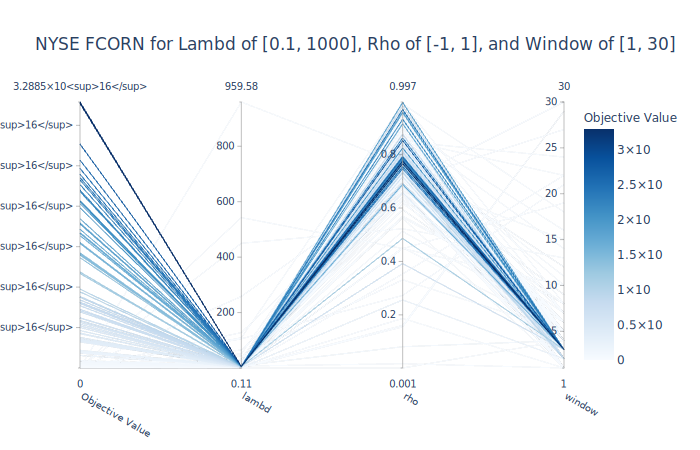

In [373]:
# NYSE FCORN
fig = optuna.visualization.plot_parallel_coordinate(nyse_fcorn)
fig.update_layout(title_text="NYSE FCORN for Lambd of [0.1, 1000], Rho of [-1, 1], and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

The results for FCORN are completely different from the previous SCORN or CORN. There is a much higher optimal rho value, one that is closer to 0.8. The optimal window continues to stay the same as SCORN with a value of 3. With the lambd value of 1, a rho of 0.8 allows the strategy to effectively identify the periods with high similarity but also incorporate the information from periods that are less correlated.

### FCORN-K

Due to computation limitations, we refrained from training the whole data on a large range of parameters for FCORN-K. Instead we used the most optimal value for SCORN and included a lambd value of 1. We will use this method for all other datasets regarding FCORN-K strategies.

In [46]:
# NYSE FCORN-K with identical parameters of highest SCORN-K.
nyse_fcornk = FCORNK(window=3, rho=4, lambd=1, k=3)
nyse_fcornk.allocate(nyse, verbose=True)

/Users/alexkwon/opt/anaconda3/envs/ht/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning:

invalid value encountered in true_divide

/Users/alexkwon/opt/anaconda3/envs/ht/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning:

invalid value encountered in true_divide



Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [188]:
# Buy and Hold.
nyse_bah = BAH()
nyse_bah.allocate(nyse)

# Constant Rebalanced Portfolio.
nyse_crp = CRP()
nyse_crp.allocate(nyse)

In [189]:
# CORN.
nyse_corn_ = CORN(window=nyse_corn.best_params['window'], rho=nyse_corn.best_params['rho'])

# CORN-U.
nyse_cornu_ = CORNU(window=nyse_cornu.best_params['window'], rho=nyse_cornu.best_params['rho'])

# SCORN.
nyse_scorn_ = SCORN(window=nyse_scorn.best_params['window'], rho=nyse_scorn.best_params['rho'])

# FCORN.
nyse_fcorn_ = FCORN(window=nyse_fcorn.best_params['window'], rho=nyse_fcorn.best_params['rho'], lambd=nyse_fcorn.best_params['lambd'])

In [190]:
# Allocate weights.
nyse_corn_.allocate(nyse)
nyse_cornu_.allocate(nyse)
nyse_scorn_.allocate(nyse)
nyse_fcorn_.allocate(nyse)

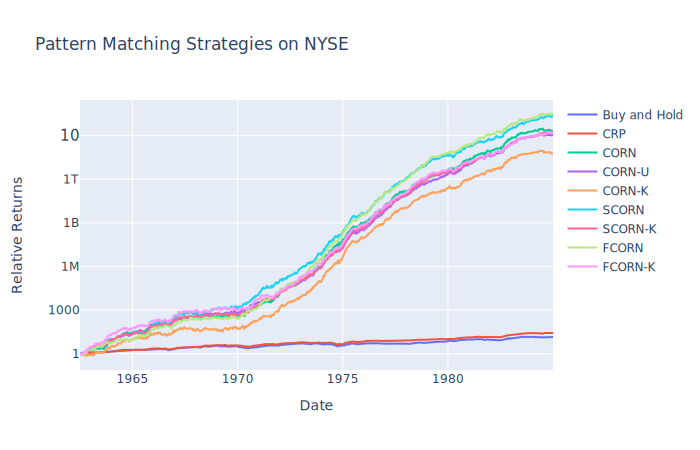

In [374]:
fig = go.Figure()
idx = nyse_bah.portfolio_return.index
fig.add_trace(go.Scatter(x=idx, y=nyse_bah.portfolio_return['Returns'], name="Buy and Hold"))
fig.add_trace(go.Scatter(x=idx, y=nyse_crp.portfolio_return['Returns'], name="CRP"))
fig.add_trace(go.Scatter(x=idx, y=nyse_corn_.portfolio_return['Returns'], name="CORN"))
fig.add_trace(go.Scatter(x=idx, y=nyse_cornu_.portfolio_return['Returns'], name="CORN-U"))
fig.add_trace(go.Scatter(x=idx, y=nyse_cornk_.portfolio_return['Returns'], name="CORN-K"))
fig.add_trace(go.Scatter(x=idx, y=nyse_scorn_.portfolio_return['Returns'], name="SCORN"))
fig.add_trace(go.Scatter(x=idx, y=nyse_scornk_.portfolio_return['Returns'], name="SCORN-K"))
fig.add_trace(go.Scatter(x=idx, y=nyse_fcorn_.portfolio_return['Returns'], name="FCORN"))
fig.add_trace(go.Scatter(x=idx, y=nyse_fcornk.portfolio_return['Returns'], name="FCORN-K"))

fig.update_layout(title='Pattern Matching Strategies on NYSE', xaxis_title='Date', yaxis_title='Relative Returns', yaxis_type="log")
fig.show()

The results posted for NYSE are close to unbelievable as returns are in the magnitude of $10^{18}$. Highest returns are posted from the resulting FCORN and SCORN algorithms, and the lowest returns were posted by the CORN-K with still an astonishing $10^{13}$. Further analysis of other datasets is needed to justify the usage of these algorithms as the NYSE may be an outlier.

## 5.2 DJIA: 2001-2003

In [192]:
# Load Optuna Study.
djia_corn = optuna.load_study(study_name='corn', storage='sqlite:///stored/djia.db')
djia_cornu = optuna.load_study(study_name='cornu', storage='sqlite:///stored/djia.db')
djia_scorn = optuna.load_study(study_name='scorn', storage='sqlite:///stored/djia.db')
djia_fcorn = optuna.load_study(study_name='fcorn', storage='sqlite:///stored/djia.db')

### CORN

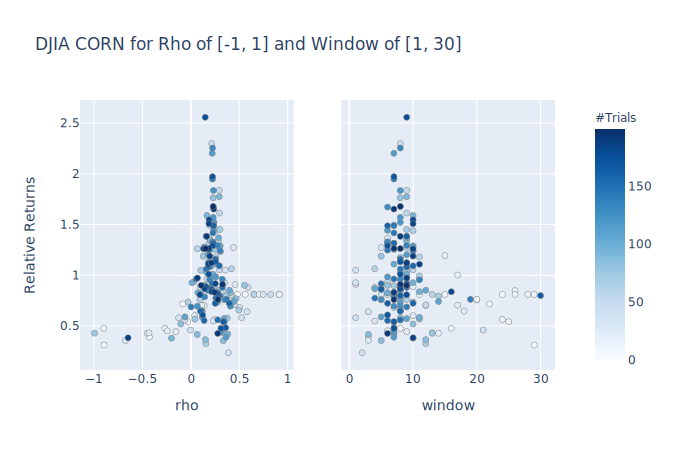

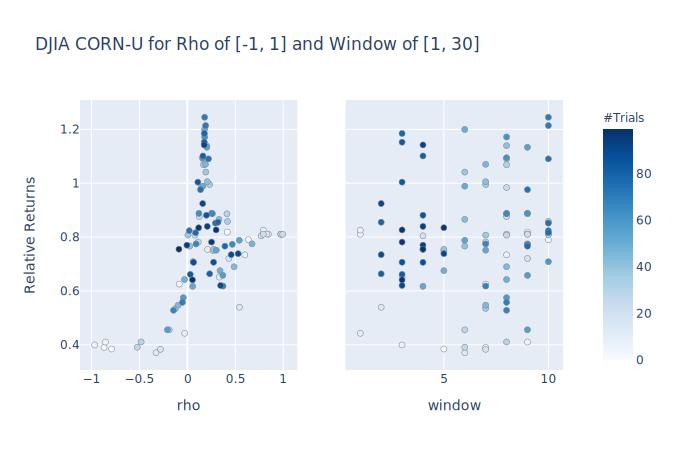

In [375]:
# DJIA CORN
fig = optuna.visualization.plot_slice(djia_corn)
fig.update_layout(title_text="DJIA CORN for Rho of [-1, 1] and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

# DJIA CORN-U
fig = optuna.visualization.plot_slice(djia_cornu)
fig.update_layout(title_text="DJIA CORN-U for Rho of [-1, 1] and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

The optimal rho value for DJIA is similar to NYSE's 0.4; however, the biggest difference in the parameter value is the optimal window. We see the highest returns with a window 7, 8, or 9. This is longer than any of the other window parameters that we have seen so far.

### CORN-K

In [194]:
# Pickled study for DJIA CORN-K parameters.
with open('pickled/djia_cornk.pickle', 'rb') as fout:
    djia_cornk = pickle.load(fout)
djia_cornk = pd.DataFrame(djia_cornk, columns=['Window','Rho','K','Returns']).sort_values('Returns', ascending=False)

In [195]:
djia_cornk.head()

Window  Rho    K   Returns
36      2.0  5.0  2.0  1.256950
202     5.0  5.0  3.0  1.206102
76      3.0  5.0  2.0  1.152687
131     4.0  5.0  2.0  1.134682
10      1.0  5.0  1.0  1.128681

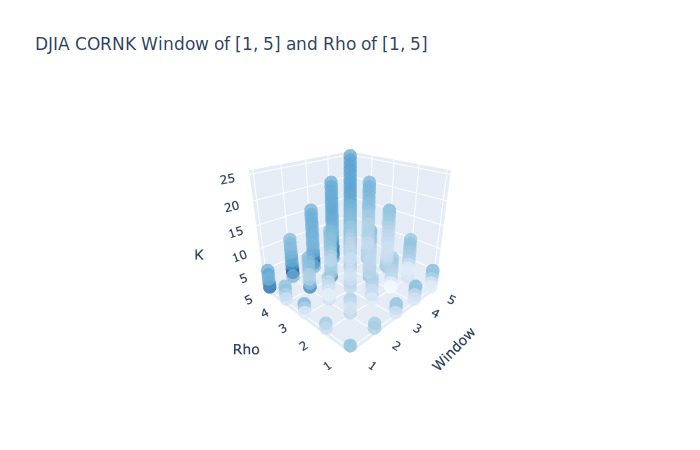

In [376]:
plot_k(djia_cornk, "DJIA CORNK Window of [1, 5] and Rho of [1, 5]")

In [57]:
# DJIA CORN-K with highest returns.
djia_cornk_ = CORNK(window=2, rho=5, k=2)
djia_cornk_.allocate(djia, verbose=True)

/Users/alexkwon/opt/anaconda3/envs/ht/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning:

invalid value encountered in true_divide

/Users/alexkwon/opt/anaconda3/envs/ht/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning:

invalid value encountered in true_divide



Progress: |██████████████████████████████████████████████████| 100.0% Complete


Knowing that the optimal window for CORN is closer to 10, our current range of window of 1 to 5 for the CORN-K tests does not encompass the full potential. Different from NYSE's CORN-K results, a lower value of K does not guarantee higher returns. In this case, a high rho value of 5 was the most important parameter as the range of correlation was needed to capture all possible variations of the strategy.

### SCORN

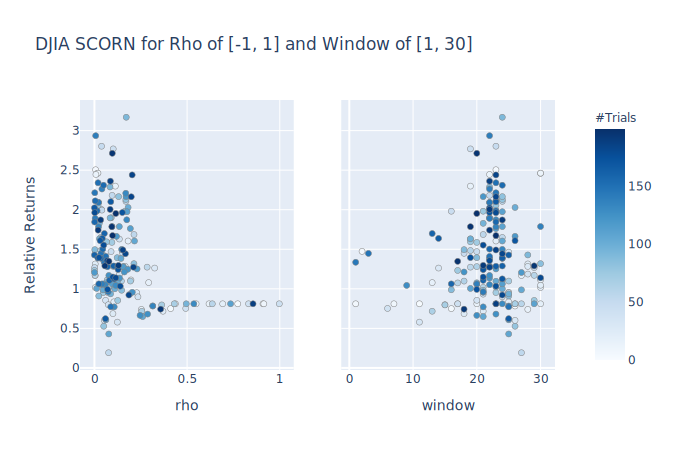

In [377]:
# DJIA SCORN
fig = optuna.visualization.plot_slice(djia_scorn)
fig.update_layout(title_text="DJIA SCORN for Rho of [-1, 1] and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

Similarly to the above CORN value, we see that the optimal window for SCORN is almost double of CORN's window value. Window closer to 22 and 23 had the highest returns. For SCORN, rho of 0 continues to have the highest returns as the binary classification of historical market windows proves to be more effective.

### SCORN-K

In [60]:
# Pickled study for DJIA SCORN-K Parameters.
with open('pickled/djia_scornk.pickle', 'rb') as fout:
    djia_scornk = pickle.load(fout)
djia_scornk = pd.DataFrame(djia_scornk, columns=['Window','Rho','K','Returns']).sort_values('Returns', ascending=False)

In [61]:
djia_scornk.head()

Window  Rho    K   Returns
0      1.0  1.0  1.0  2.095896
1      1.0  2.0  1.0  2.029591
10     1.0  5.0  1.0  1.844303
6      1.0  4.0  1.0  1.789960
3      1.0  3.0  1.0  1.773378

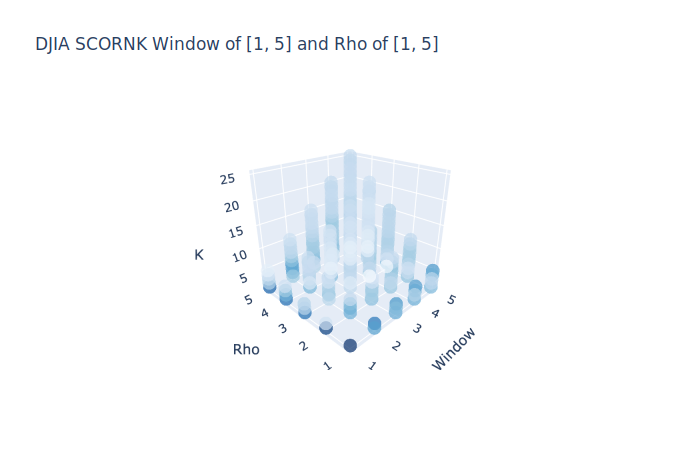

In [378]:
plot_k(djia_scornk, "DJIA SCORNK Window of [1, 5] and Rho of [1, 5]")

In [62]:
# DJIA SCORN-K with highest returns.
djia_scornk_ = SCORNK(window=1, rho=1, k=1)
djia_scornk_.allocate(djia, verbose=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


Window range of 1 to 5 is suboptimal for SCORN-K as the optimal window range for SCORN is much higher at 22. Because the SCORN continues to prefer a binary classification regarding its similarity threshold, rho of 1 is sufficient to capture the highest returns as rho of 1 indicates a threshold at 0.

### FCORN

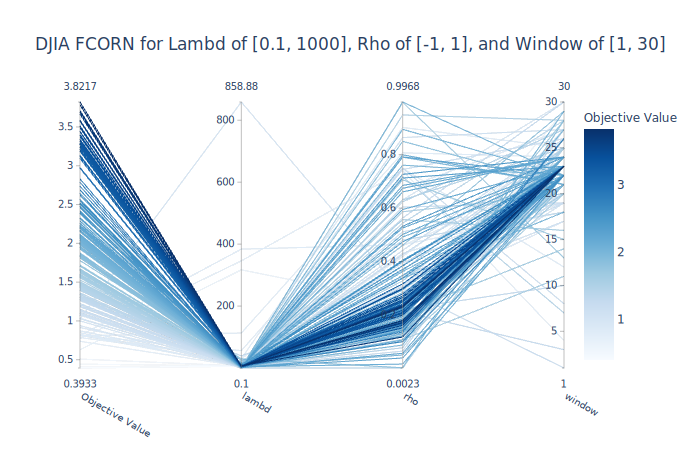

In [379]:
# DJIA FCORN
fig = optuna.visualization.plot_parallel_coordinate(djia_fcorn)
fig.update_layout(title_text="DJIA FCORN for Lambd of [0.1, 1000], Rho of [-1, 1], and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

FCORN also has higher returns for window value near 22, and we actually see a different optimal rho value near 0.2. It is difficult, however, to say that there is only one best rho range as we see dark lines pass through a significant range of rho. Lambd of 1 continues to provide the highest returns for FCORN values.

### FCORN-K

In [65]:
# DJIA FCORN-K with parameters for SCORN-K with highest returns.
djia_fcornk = FCORNK(window=1, rho=1, lambd=1, k=1)
djia_fcornk.allocate(djia, verbose=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [69]:
# Buy and Hold.
djia_bah = BAH()
djia_bah.allocate(djia)

# Constant Rebalanced Portfolio.
djia_crp = CRP()
djia_crp.allocate(djia)

In [105]:
# CORN.
djia_corn_ = CORN(window=djia_corn.best_params['window'], rho=djia_corn.best_params['rho'])

# CORN-U.
djia_cornu_ = CORNU(window=djia_cornu.best_params['window'], rho=djia_cornu.best_params['rho'])

# SCORN.
djia_scorn_ = SCORN(window=djia_scorn.best_params['window'], rho=djia_scorn.best_params['rho'])

# FCORN.
djia_fcorn_ = FCORN(window=djia_fcorn.best_params['window'], rho=djia_fcorn.best_params['rho'], lambd=djia_fcorn.best_params['lambd'])

In [106]:
# Allocate weights.
djia_corn_.allocate(djia)
djia_cornu_.allocate(djia)
djia_scorn_.allocate(djia)
djia_fcorn_.allocate(djia)

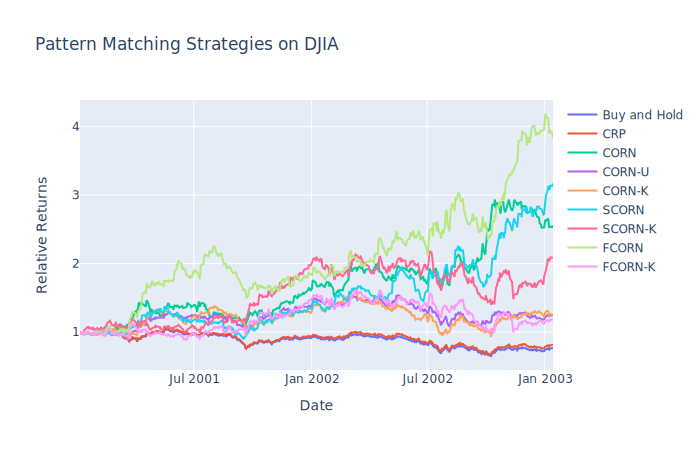

In [380]:
fig = go.Figure()
idx = djia_bah.portfolio_return.index
fig.add_trace(go.Scatter(x=idx, y=djia_bah.portfolio_return['Returns'], name="Buy and Hold"))
fig.add_trace(go.Scatter(x=idx, y=djia_crp.portfolio_return['Returns'], name="CRP"))
fig.add_trace(go.Scatter(x=idx, y=djia_corn_.portfolio_return['Returns'], name="CORN"))
fig.add_trace(go.Scatter(x=idx, y=djia_cornu_.portfolio_return['Returns'], name="CORN-U"))
fig.add_trace(go.Scatter(x=idx, y=djia_cornk_.portfolio_return['Returns'], name="CORN-K"))
fig.add_trace(go.Scatter(x=idx, y=djia_scorn_.portfolio_return['Returns'], name="SCORN"))
fig.add_trace(go.Scatter(x=idx, y=djia_scornk_.portfolio_return['Returns'], name="SCORN-K"))
fig.add_trace(go.Scatter(x=idx, y=djia_fcorn_.portfolio_return['Returns'], name="FCORN"))
fig.add_trace(go.Scatter(x=idx, y=djia_fcornk.portfolio_return['Returns'], name="FCORN-K"))

fig.update_layout(title='Pattern Matching Strategies on DJIA', xaxis_title='Date', yaxis_title='Relative Returns')
fig.show()

CORN performs significantly better than the benchmarks strategies for DJIA. This is a market with a continuous downtrend, and the current problem formulation only allows for a long-only portfolio. CORN is able to capture the patterns in these strategies as we see double and triple returns. SCORN-K and FCORN-K have lower returns due to the incorrect window range set by the initial testing phase. Preliminary results indicate that these CORN strategies can be applied for a market with a general bear run as well.

## 5.3 TSE: 1994-1998

In [196]:
# Load Optuna Study.
tse_corn = optuna.load_study(study_name='corn', storage='sqlite:///stored/tse.db')
tse_cornu = optuna.load_study(study_name='cornu', storage='sqlite:///stored/tse.db')
tse_scorn = optuna.load_study(study_name='scorn', storage='sqlite:///stored/tse.db')
tse_fcorn = optuna.load_study(study_name='fcorn', storage='sqlite:///stored/tse.db')

### CORN

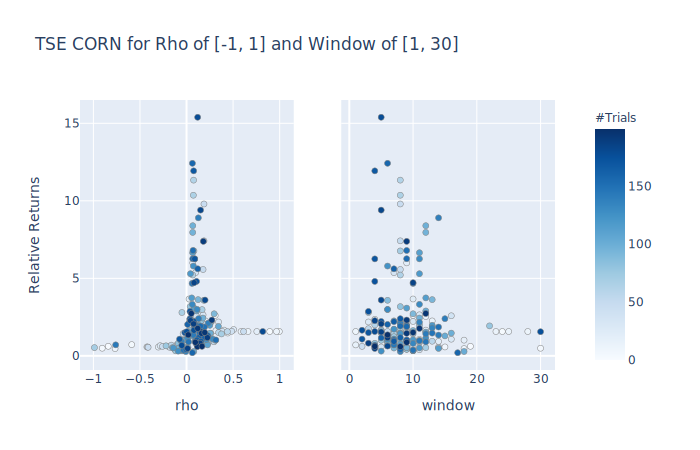

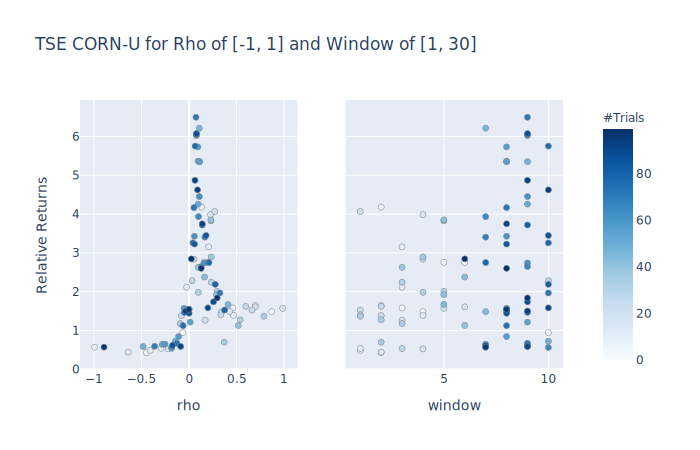

In [381]:
# TSE CORN
fig = optuna.visualization.plot_slice(tse_corn)
fig.update_layout(title_text="TSE CORN for Rho of [-1, 1] and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

# TSE CORN-U
fig = optuna.visualization.plot_slice(tse_cornu)
fig.update_layout(title_text="TSE CORN-U for Rho of [-1, 1] and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

The optimal rho for TSE is lower than the previous datasets with rho of 0.1, and the distribution of the window value for CORN does not indicate a clear, explainable pattern.

### CORN-K

In [198]:
# Pickled studies for TSE CORN-K parameters.
with open('pickled/tse_cornk.pickle', 'rb') as fout:
    tse_cornk = pickle.load(fout)
tse_cornk = pd.DataFrame(tse_cornk, columns=['Window','Rho','K','Returns']).sort_values('Returns', ascending=False)

In [199]:
tse_cornk.head()

Window  Rho    K   Returns
0       1.0  1.0  1.0  5.445546
15      2.0  1.0  1.0  4.388148
45      3.0  1.0  1.0  4.303288
90      4.0  1.0  1.0  4.194859
150     5.0  1.0  1.0  3.903613

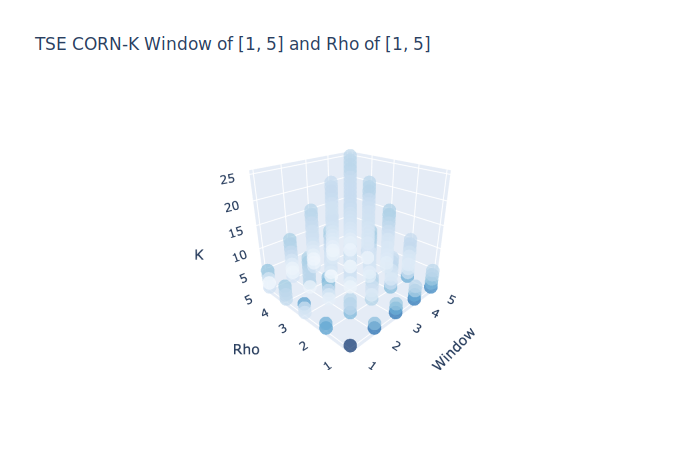

In [382]:
plot_k(tse_cornk, "TSE CORN-K Window of [1, 5] and Rho of [1, 5]")

In [200]:
# TSE CORN-K with highest returns.
tse_cornk_ = CORNK(window=1, rho=1, k=1)
tse_cornk_.allocate(tse, verbose=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


CORN-K represents the same pattern as the CORN strategy with a rho of 1 being the most optimal. All values of the window return similar darkness as window ranges fail to make a significant impact on returns.

### SCORN

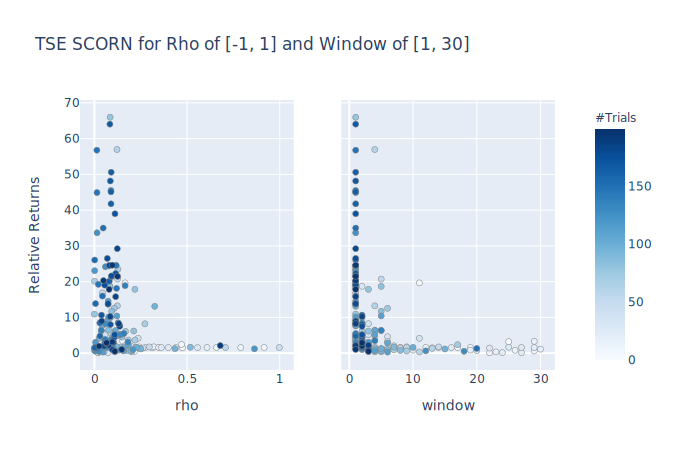

In [386]:
# TSE SCORN
fig = optuna.visualization.plot_slice(tse_scorn)
fig.update_layout(title_text="TSE SCORN for Rho of [-1, 1] and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

Unlike for CORN, SCORN has a clear pattern with the optimal window value of 1. There is a higher concentration of values for a window of 1, and the best rho value is slightly off from 0 at 0.1. In fact, SCORN leaves out the market periods with a correlation near 0 by having the threshold slightly above the neutral value.

### SCORN-K

In [78]:
# Pickled study for TSE SCORN-K parameters.
with open('pickled/tse_scornk.pickle', 'rb') as fout:
    tse_scornk = pickle.load(fout)
tse_scornk = pd.DataFrame(tse_scornk, columns=['Window','Rho','K','Returns']).sort_values('Returns', ascending=False)

In [79]:
tse_scornk.head()

Window  Rho    K    Returns
4      1.0  3.0  2.0  20.951052
22     2.0  3.0  2.0  15.209088
46     3.0  1.0  2.0  14.540349
56     3.0  3.0  3.0  14.427613
0      1.0  1.0  1.0  14.332423

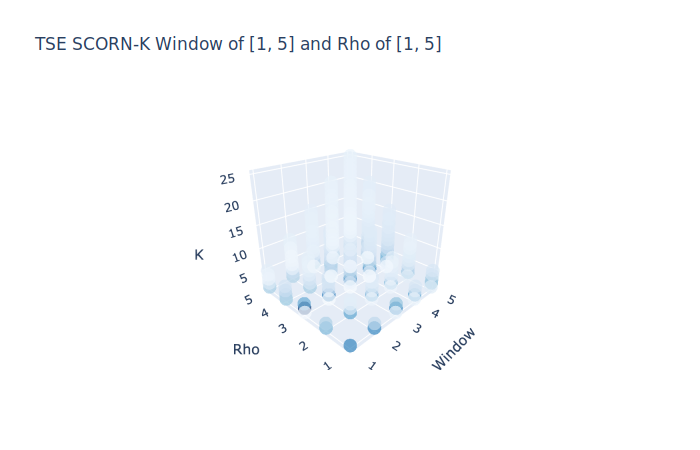

In [383]:
plot_k(tse_scornk, "TSE SCORN-K Window of [1, 5] and Rho of [1, 5]")

In [80]:
# TSE SCORN-K with highest returns.
tse_scornk_ = SCORNK(window=1, rho=3, k=2)
tse_scornk_.allocate(tse, verbose=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


As the optimal value for the window is in the lower range at 1, the darker circles appear near a window of 1 for SCORN-K. Interestingly, the highest returns appear for a rho of 3 instead of 1. This is primarily because the optimal rho value is not exactly at 0, but a value between 0 and $\frac{1}{3}$.

### FCORN

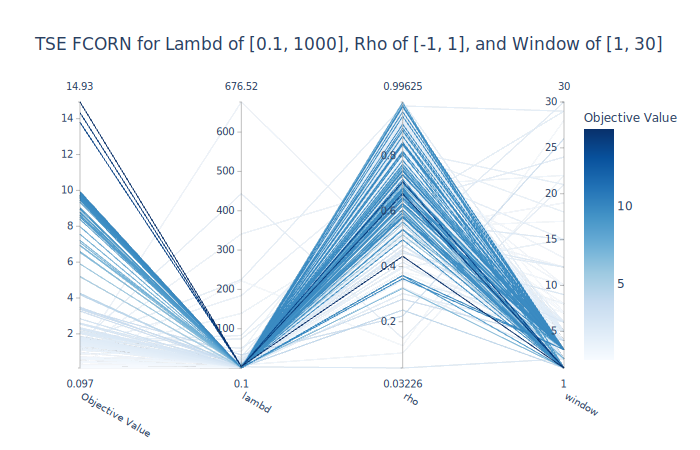

In [384]:
# TSE FCORN
fig = optuna.visualization.plot_parallel_coordinate(tse_fcorn)
fig.update_layout(title_text="TSE FCORN for Lambd of [0.1, 1000], Rho of [-1, 1], and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

FCORN for TSE displays similar patterns to the previous DJIA. There is a wide range of optimal rho and a clear preference for low lambda and window value. If we had to pinpoint the optimal rho, a value of 0.7 would represent the median, which is in line with the previous optimal rho for FCORN.

### FCORN-K

In [83]:
# TSE FCORN-K with highest SCORN-K's parameters.
tse_fcornk = FCORNK(window=1, rho=3, lambd=1, k=2)
tse_fcornk.allocate(tse, verbose=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [85]:
# Buy and Hold.
tse_bah = BAH()
tse_bah.allocate(tse)

# Constant Rebalanced Portfolio.
tse_crp = CRP()
tse_crp.allocate(tse)

In [201]:
# CORN.
tse_corn_ = CORN(window=tse_corn.best_params['window'], rho=tse_corn.best_params['rho'])

# CORN-U.
tse_cornu_ = CORNU(window=tse_cornu.best_params['window'], rho=tse_cornu.best_params['rho'])

# SCORN.
tse_scorn_ = SCORN(window=tse_scorn.best_params['window'], rho=tse_scorn.best_params['rho'])

# FCORN.
tse_fcorn_ = FCORN(window=tse_fcorn.best_params['window'], rho=tse_fcorn.best_params['rho'], lambd=tse_fcorn.best_params['lambd'])

In [202]:
# Allocate weights.
tse_corn_.allocate(tse)
tse_cornu_.allocate(tse)
tse_scorn_.allocate(tse)
tse_fcorn_.allocate(tse)

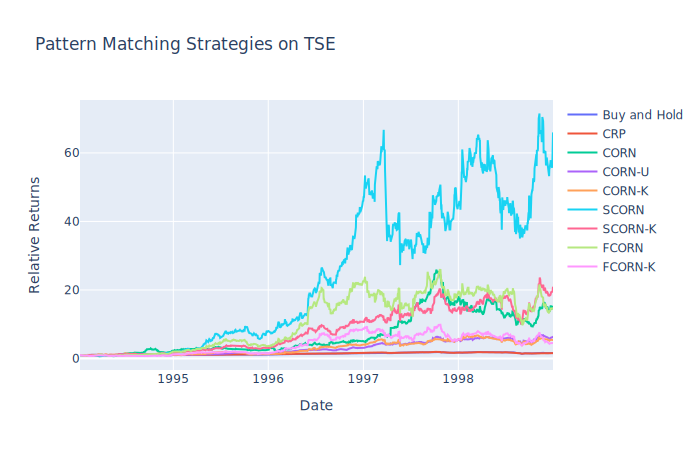

In [385]:
fig = go.Figure()
idx = tse_bah.portfolio_return.index
fig.add_trace(go.Scatter(x=idx, y=tse_bah.portfolio_return['Returns'], name="Buy and Hold"))
fig.add_trace(go.Scatter(x=idx, y=tse_crp.portfolio_return['Returns'], name="CRP"))
fig.add_trace(go.Scatter(x=idx, y=tse_corn_.portfolio_return['Returns'], name="CORN"))
fig.add_trace(go.Scatter(x=idx, y=tse_cornu_.portfolio_return['Returns'], name="CORN-U"))
fig.add_trace(go.Scatter(x=idx, y=tse_cornk_.portfolio_return['Returns'], name="CORN-K"))
fig.add_trace(go.Scatter(x=idx, y=tse_scorn_.portfolio_return['Returns'], name="SCORN"))
fig.add_trace(go.Scatter(x=idx, y=tse_scornk_.portfolio_return['Returns'], name="SCORN-K"))
fig.add_trace(go.Scatter(x=idx, y=tse_fcorn_.portfolio_return['Returns'], name="FCORN"))
fig.add_trace(go.Scatter(x=idx, y=tse_fcornk.portfolio_return['Returns'], name="FCORN-K"))

fig.update_layout(title='Pattern Matching Strategies on TSE', xaxis_title='Date', yaxis_title='Relative Returns')
fig.show()

SCORN had significantly higher returns compared to other strategies with a sudden rise in 1996 3Q. Other strategies still fared well as we see returns close to 20 times the original value. We also see the biggest drawback of a capital growth portfolio here as well, with the huge drawdown near 1997 2Q and 1998 2Q. The algorithms optimize for maximum wealth rather than minimizing the risk.

## SP500: 1998-2003

In [204]:
# Load Optuna Study.
sp500_corn = optuna.load_study(study_name='corn', storage='sqlite:///stored/sp500.db')
sp500_cornu = optuna.load_study(study_name='cornu', storage='sqlite:///stored/sp500.db')
sp500_scorn = optuna.load_study(study_name='scorn', storage='sqlite:///stored/sp500.db')
sp500_fcorn = optuna.load_study(study_name='fcorn', storage='sqlite:///stored/sp500.db')

### CORN

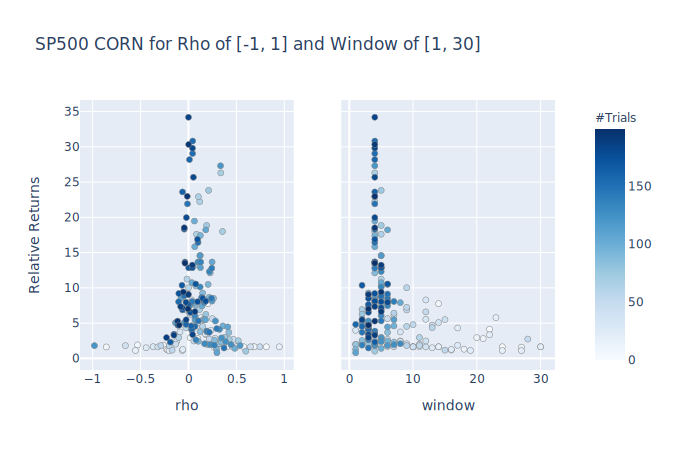

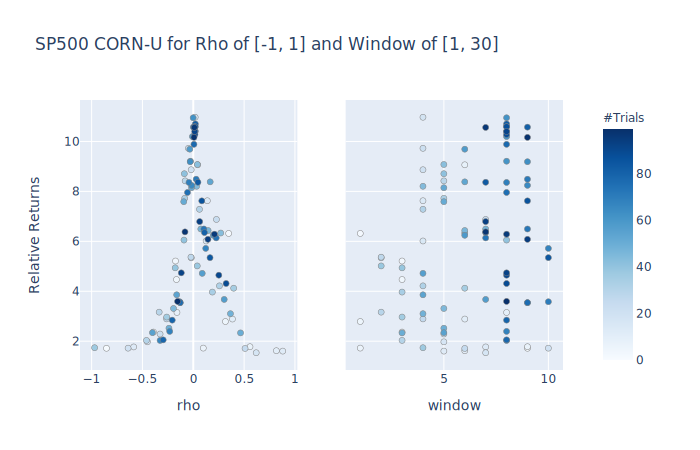

In [387]:
# SP500 CORN
fig = optuna.visualization.plot_slice(sp500_corn)
fig.update_layout(title_text="SP500 CORN for Rho of [-1, 1] and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

# SP500 CORN-U
fig = optuna.visualization.plot_slice(sp500_cornu)
fig.update_layout(title_text="SP500 CORN-U for Rho of [-1, 1] and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

CORN strategies applied to SP500 indicate an interesting pattern as the optimal rho is right at 0. The strategy designated a time period as similar if the coefficient was non-negative. The optimal window value also has a clear result at 4 with the highest results reaching 35.

### CORN-K

In [206]:
# Pickled study for CORN-K with different parameters.
with open('pickled/sp500_cornk.pickle', 'rb') as fout:
    sp500_cornk = pickle.load(fout)
sp500_cornk = pd.DataFrame(sp500_cornk, columns=['Window','Rho','K','Returns']).sort_values('Returns', ascending=False)

In [207]:
sp500_cornk.head()

Window  Rho    K    Returns
90      4.0  1.0  1.0  25.933588
150     5.0  1.0  1.0  23.418687
94      4.0  2.0  1.0  18.556358
103     4.0  3.0  2.0  18.180983
151     5.0  1.0  2.0  17.496739

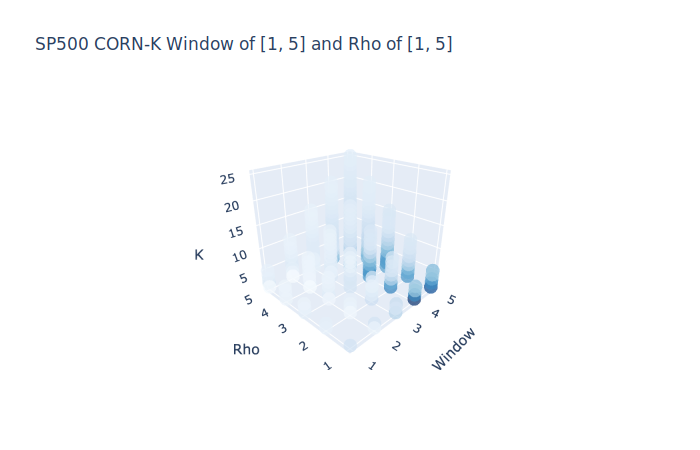

In [388]:
plot_k(sp500_cornk, "SP500 CORN-K Window of [1, 5] and Rho of [1, 5]")

In [208]:
# SP500 CORN-K with highest returns.
sp500_cornk_ = CORNK(window=4, rho=1, k=1)
sp500_cornk_.allocate(sp500, verbose=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In line with the CORN applications, CORN-K displays the highest returns with an ideal rho of 1 and a window of 4.

### SCORN

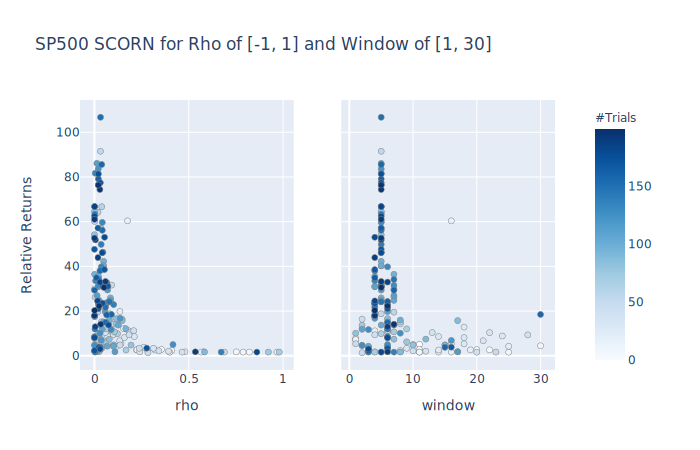

In [389]:
# SP500 SCORN
fig = optuna.visualization.plot_slice(sp500_scorn)
fig.update_layout(title_text="SP500 SCORN for Rho of [-1, 1] and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

As with other datasets, ideal rho is close to 0, and the best window value is at 5. Results for SCORN in fact reach close to 100, triple the results of CORN.

### SCORN-K

In [95]:
# SP500 SCORN-K with highest returns.
with open('pickled/sp500_scornk.pickle', 'rb') as fout:
    sp500_scornk = pickle.load(fout)
sp500_scornk = pd.DataFrame(sp500_scornk, columns=['Window','Rho','K','Returns']).sort_values('Returns', ascending=False)

In [96]:
sp500_scornk.head()

Window  Rho    K    Returns
155     5.0  2.0  1.0  30.569137
150     5.0  1.0  1.0  29.961015
180     5.0  4.0  1.0  24.678792
151     5.0  1.0  2.0  21.236055
181     5.0  4.0  2.0  21.107956

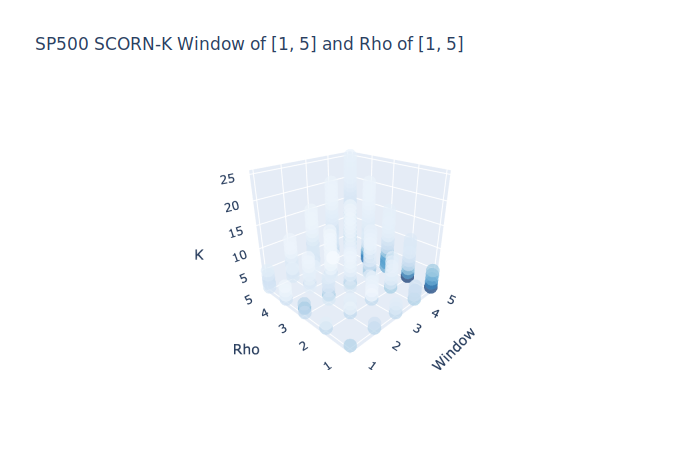

In [390]:
plot_k(sp500_scornk, "SP500 SCORN-K Window of [1, 5] and Rho of [1, 5]")

In [97]:
# SP500 SCORN-K with highest returns.
sp500_scornk_ = SCORNK(window=5, rho=2, k=1)
sp500_scornk_.allocate(sp500, verbose=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


Any rho value that has a window of 5 displayed significantly higher returns for SCORN-K.

### FCORN

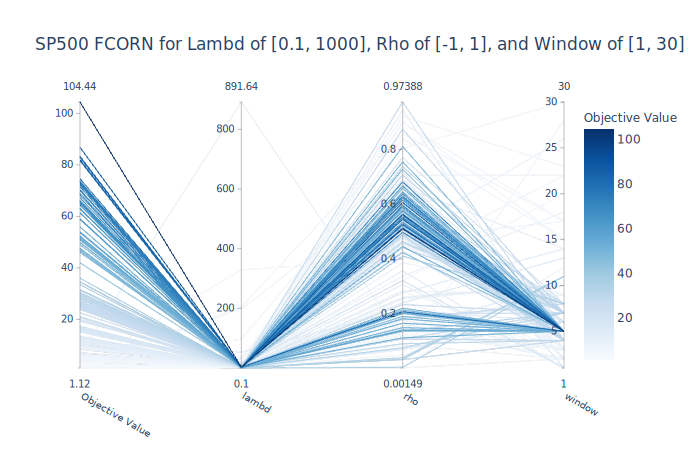

In [391]:
# SP500 FCORN
fig = optuna.visualization.plot_parallel_coordinate(sp500_fcorn)
fig.update_layout(title_text="SP500 FCORN for Lambd of [0.1, 1000], Rho of [-1, 1], and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

FCORN-K has the same optimal window value as SCORN-K at 5. Lambd continues to have higher returns at a lower value. The ranges for rho, however, are more divided as we see a clear segment at 0.2 and 0.6. It is difficult to explain how a rho of 0.2 would produce higher returns, but the value of 0.6 is in line with the previous results.

### FCORN-K

In [100]:
# SP500 FCORN-K with highest SCORN-K's parameters.
sp500_fcornk_ = FCORNK(window=5, rho=2, lambd=1, k=1)
sp500_fcornk_.allocate(sp500, verbose=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [101]:
# Buy and Hold.
sp500_bah = BAH()
sp500_bah.allocate(sp500)

# Constant Rebalanced Portfolio.
sp500_crp = CRP()
sp500_crp.allocate(sp500)

In [210]:
# CORN.
sp500_corn_ = CORN(window=sp500_corn.best_params['window'], rho=sp500_corn.best_params['rho'])

# CORN-U.
sp500_cornu_ = CORNU(window=sp500_cornu.best_params['window'], rho=sp500_cornu.best_params['rho'])

# SCORN.
sp500_scorn_ = SCORN(window=sp500_scorn.best_params['window'], rho=sp500_scorn.best_params['rho'])

# FCORN.
sp500_fcorn_ = FCORN(window=sp500_fcorn.best_params['window'], rho=sp500_fcorn.best_params['rho'], lambd=sp500_fcorn.best_params['lambd'])

In [211]:
# Allocate weights.
sp500_corn_.allocate(sp500)
sp500_cornu_.allocate(sp500)
sp500_scorn_.allocate(sp500)
sp500_fcorn_.allocate(sp500)

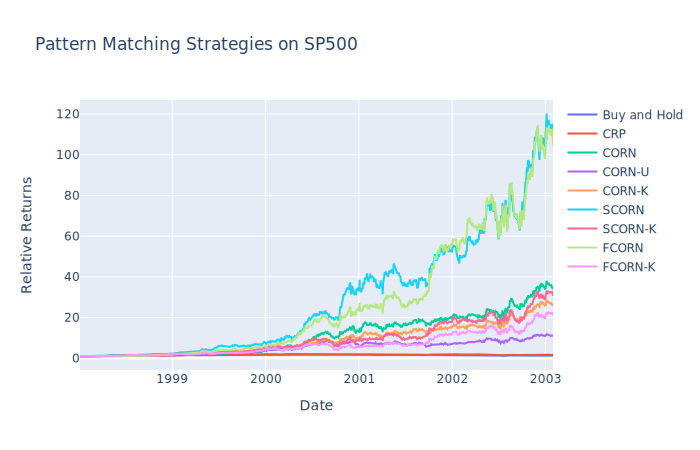

In [392]:
fig = go.Figure()
idx = sp500_bah.portfolio_return.index
fig.add_trace(go.Scatter(x=idx, y=sp500_bah.portfolio_return['Returns'], name="Buy and Hold"))
fig.add_trace(go.Scatter(x=idx, y=sp500_crp.portfolio_return['Returns'], name="CRP"))
fig.add_trace(go.Scatter(x=idx, y=sp500_corn_.portfolio_return['Returns'], name="CORN"))
fig.add_trace(go.Scatter(x=idx, y=sp500_cornu_.portfolio_return['Returns'], name="CORN-U"))
fig.add_trace(go.Scatter(x=idx, y=sp500_cornk_.portfolio_return['Returns'], name="CORN-K"))
fig.add_trace(go.Scatter(x=idx, y=sp500_scorn_.portfolio_return['Returns'], name="SCORN"))
fig.add_trace(go.Scatter(x=idx, y=sp500_scornk_.portfolio_return['Returns'], name="SCORN-K"))
fig.add_trace(go.Scatter(x=idx, y=sp500_fcorn_.portfolio_return['Returns'], name="FCORN"))
fig.add_trace(go.Scatter(x=idx, y=sp500_fcornk_.portfolio_return['Returns'], name="FCORN-K"))

fig.update_layout(title='Pattern Matching Strategies on SP500', xaxis_title='Date', yaxis_title='Relative Returns')
fig.show()

The tuned values for SCORN and FCORN reach returns of 120, and the more realistic application of SCORN-K and FCORN-K have returns that are close to 30. In an ideal scenario, the correct parameters should be identified to have high returns, but even if we do not have the exact values, the relatively high returns of SCORN-K and FCORN-K indicate a possibility of applications to a real trading environment.

## MSCI: 1993-2020

In [ ]:
# Load Optuna Study.
msci_corn = optuna.load_study(study_name='corn', storage='sqlite:///stored/msci.db')
msci_cornu = optuna.load_study(study_name='cornu', storage='sqlite:///stored/msci.db')
msci_scorn = optuna.load_study(study_name='scorn', storage='sqlite:///stored/msci.db')
msci_fcorn = optuna.load_study(study_name='fcorn', storage='sqlite:///stored/msci.db')

### CORN

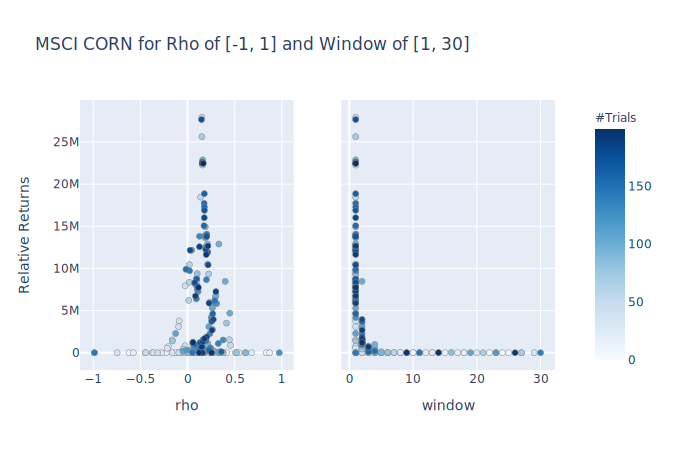

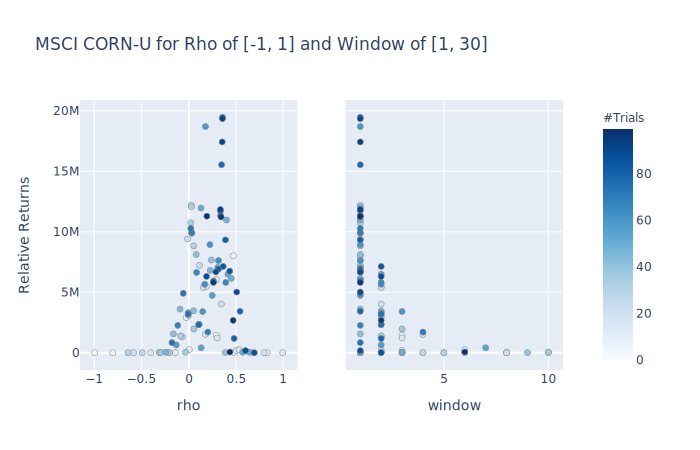

In [393]:
# MSCI CORN
fig = optuna.visualization.plot_slice(msci_corn)
fig.update_layout(title_text="MSCI CORN for Rho of [-1, 1] and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

# MSCI CORN-U
fig = optuna.visualization.plot_slice(msci_cornu)
fig.update_layout(title_text="MSCI CORN-U for Rho of [-1, 1] and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

The returns for MSCI are also extremely high with applications with CORN. With a rho of 0.2, we see results that reach well above $10^8$; however, looking at the graph for CORN closely, we see that there is a slight segmentation between the 9 and 7 million returns. This might indicate that the results are extremely sensitive to your parameter choice.

### CORN-K

In [110]:
# Pickled study for MSCI CORN-K with different parameters.
with open('pickled/msci_cornk.pickle', 'rb') as fout:
    msci_cornk = pickle.load(fout)
msci_cornk = pd.DataFrame(msci_cornk, columns=['Window','Rho','K','Returns']).sort_values('Returns', ascending=False)

In [111]:
msci_cornk.head()

Window  Rho    K       Returns
4      1.0  3.0  2.0  1.032502e+07
2      1.0  2.0  2.0  1.032196e+07
12     1.0  5.0  3.0  9.460062e+06
3      1.0  3.0  1.0  8.776678e+06
7      1.0  4.0  2.0  8.601446e+06

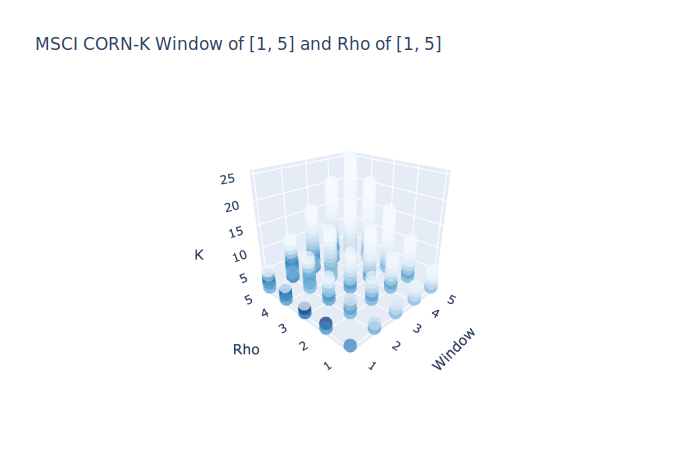

In [394]:
plot_k(msci_cornk, "MSCI CORN-K Window of [1, 5] and Rho of [1, 5]")

In [116]:
# MSCI CORN-K with highest returns
msci_cornk_ = CORNK(window=1, rho=3, k=2)
msci_cornk_.allocate(msci, verbose=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


With a rho value of 3 being the highest for CORN-K, we see a trend with the optimal selection of rho. For datasets with optimal rho value near 0.2. Rho of 3 represents the highest returns as the strategy can alternate between a rho of 0 and $\frac{1}{3}$.

### SCORN

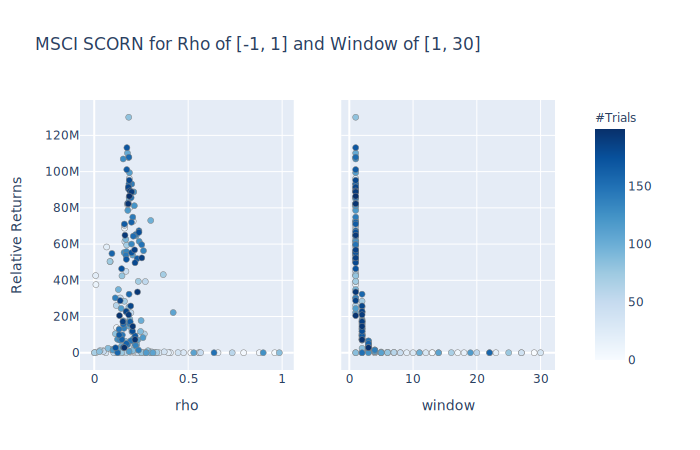

In [395]:
# MSCI SCORN
fig = optuna.visualization.plot_slice(msci_scorn)
fig.update_layout(title_text="MSCI SCORN for Rho of [-1, 1] and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

The SCORN results for MSCI are significantly different from previous sets. Rho of 0 is no longer the optimal as we see the value shifted to 0.2. Moreover, we see that the optimal window is 1, but if you take a closer look at the bottom values of window 1, there is a huge gap between 0 and 20M. A more detailed analysis of this phenomena is required, but it is likely that for a window value of 1 a wider range of rho is accepted to produce similar returns.

### SCORN-K

In [114]:
# Pickled study with MSCI SCORN-K with different parameters.
with open('pickled/msci_scornk.pickle', 'rb') as fout:
    msci_scornk = pickle.load(fout)
msci_scornk = pd.DataFrame(msci_scornk, columns=['Window','Rho','K','Returns']).sort_values('Returns', ascending=False)

In [118]:
msci_scornk.head()

Window  Rho    K       Returns
0      1.0  1.0  1.0  9.755021e+07
45     3.0  1.0  1.0  8.090060e+07
4      1.0  3.0  2.0  7.987394e+07
15     2.0  1.0  1.0  7.975023e+07
11     1.0  5.0  2.0  7.758903e+07

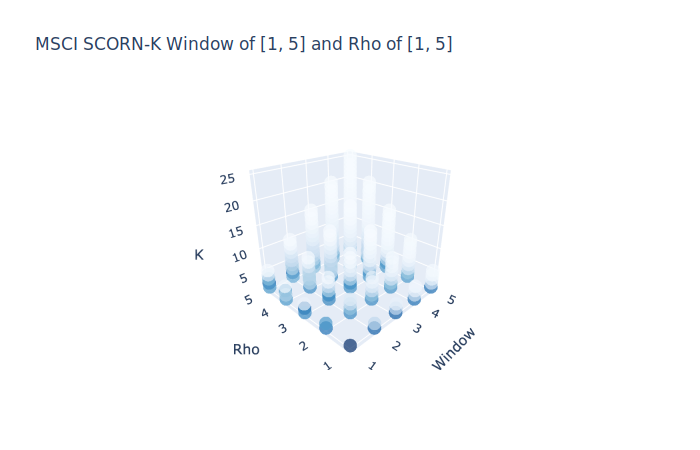

In [396]:
plot_k(msci_scornk, "MSCI SCORN-K Window of [1, 5] and Rho of [1, 5]")

In [120]:
# MSCI SCORN-K with highest returns.
msci_scornk_ = SCORNK(window=1, rho=1, k=1)
msci_scornk_.allocate(msci, verbose=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In general, SCORN-K graph shows that as long as k is 1 most combinations have high returns. This most likely happens because the ideal window value is strictly 1, and therefore any combination of portfolios that have a parameter of 1 will have high returns.

### FCORN

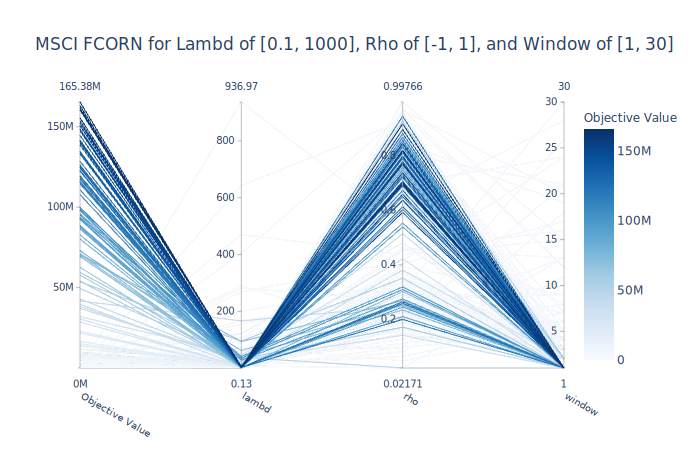

In [397]:
# MSCI FCORN
fig = optuna.visualization.plot_parallel_coordinate(msci_fcorn)
fig.update_layout(title_text="MSCI FCORN for Lambd of [0.1, 1000], Rho of [-1, 1], and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

### FCORN-K

In [123]:
# MSCI FCORN-K
msci_fcornk = FCORNK(window=1, rho=1, lambd=1, k=1)
msci_fcornk.allocate(msci, verbose=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [125]:
# Buy and Hold.
msci_bah = BAH()
msci_bah.allocate(msci)

# Constant Rebalanced Portfolio.
msci_crp = CRP()
msci_crp.allocate(msci)

In [126]:
# CORN.
msci_corn_ = CORN(window=msci_corn.best_params['window'], rho=msci_corn.best_params['rho'])

# CORN-U.
msci_cornu_ = CORNU(window=msci_cornu.best_params['window'], rho=msci_cornu.best_params['rho'])

# SCORN.
msci_scorn_ = SCORN(window=msci_scorn.best_params['window'], rho=msci_scorn.best_params['rho'])

# FCORN.
msci_fcorn_ = FCORN(window=msci_fcorn.best_params['window'], rho=msci_fcorn.best_params['rho'], lambd=msci_fcorn.best_params['lambd'])

In [127]:
# Allocate weights.
msci_corn_.allocate(msci)
msci_cornu_.allocate(msci)
msci_scorn_.allocate(msci)
msci_fcorn_.allocate(msci)

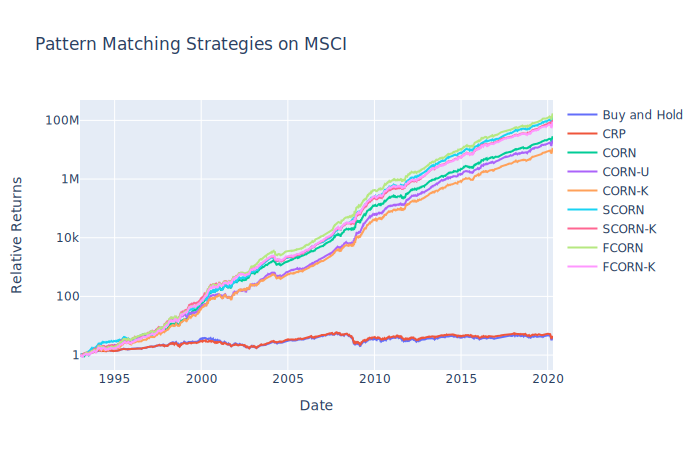

In [398]:
fig = go.Figure()
idx = msci_bah.portfolio_return.index
fig.add_trace(go.Scatter(x=idx, y=msci_bah.portfolio_return['Returns'], name="Buy and Hold"))
fig.add_trace(go.Scatter(x=idx, y=msci_crp.portfolio_return['Returns'], name="CRP"))
fig.add_trace(go.Scatter(x=idx, y=msci_corn_.portfolio_return['Returns'], name="CORN"))
fig.add_trace(go.Scatter(x=idx, y=msci_cornu_.portfolio_return['Returns'], name="CORN-U"))
fig.add_trace(go.Scatter(x=idx, y=msci_cornk_.portfolio_return['Returns'], name="CORN-K"))
fig.add_trace(go.Scatter(x=idx, y=msci_scorn_.portfolio_return['Returns'], name="SCORN"))
fig.add_trace(go.Scatter(x=idx, y=msci_scornk_.portfolio_return['Returns'], name="SCORN-K"))
fig.add_trace(go.Scatter(x=idx, y=msci_fcorn_.portfolio_return['Returns'], name="FCORN"))
fig.add_trace(go.Scatter(x=idx, y=msci_fcornk.portfolio_return['Returns'], name="FCORN-K"))

fig.update_layout(title='Pattern Matching Strategies on MSCI', xaxis_title='Date', yaxis_title='Relative Returns', yaxis_type="log")
fig.show()

Other than the overfitting SCORN and FCORN graphs, the other k-aggregated algorithms perform significantly better than the benchmarks. FCORN-K in fact is able to almost match the other two with SCORN-K and CORN-K closely following behind.

## US Equity: 2011-2020

In [136]:
# Load Optuna Study.
equity_corn = optuna.load_study(study_name='corn', storage='sqlite:///stored/equity.db')
equity_cornu = optuna.load_study(study_name='cornu', storage='sqlite:///stored/equity.db')
equity_scorn = optuna.load_study(study_name='scorn', storage='sqlite:///stored/equity.db')
equity_fcorn = optuna.load_study(study_name='fcorn', storage='sqlite:///stored/equity.db')

### CORN

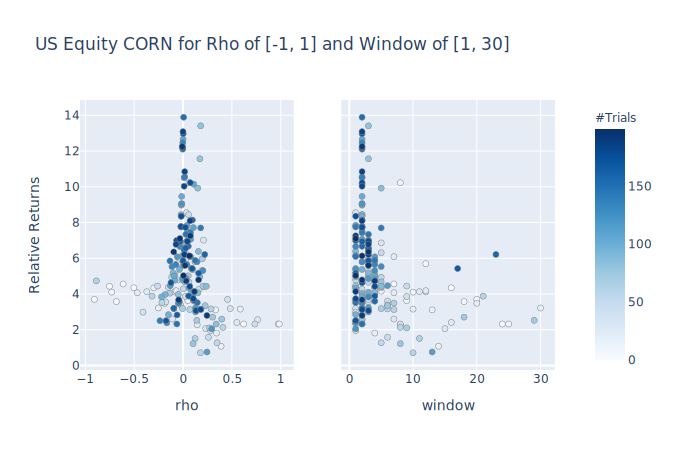

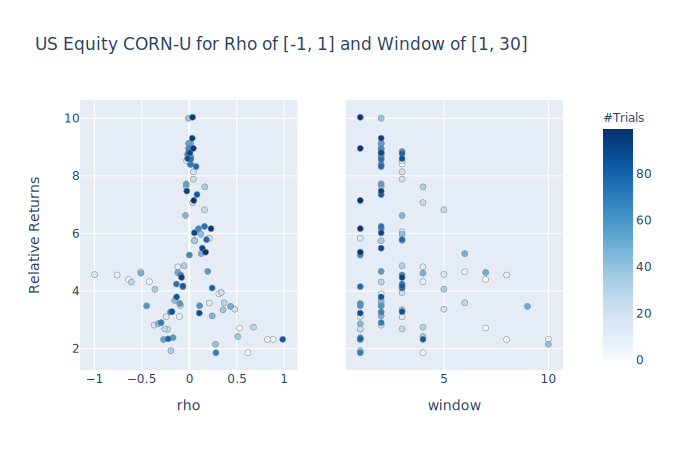

In [399]:
# US Equity CORN
fig = optuna.visualization.plot_slice(equity_corn)
fig.update_layout(title_text="US Equity CORN for Rho of [-1, 1] and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

# US Equity CORN-U
fig = optuna.visualization.plot_slice(equity_cornu)
fig.update_layout(title_text="US Equity CORN-U for Rho of [-1, 1] and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

The CORN data with US Equity provides the most interesting results as this is directly applicable to a more modern timeline. Highest returns typically congregated around rho of 1 and a window of 2. In a way, the rho of 0 implies that any past history window with a non-negative correlation should be incorporated in the calculation, and a window of 2 indicates that a price trend should be looked at in a 2-day rolling window for correlation calculations.

### CORN-K

In [174]:
# Pickled study for US Equity CORN-K with different parameters.
with open('pickled/equity_cornk.pickle', 'rb') as fout:
    equity_cornk = pickle.load(fout)
equity_cornk = pd.DataFrame(equity_cornk, columns=['Window','Rho','K','Returns']).sort_values('Returns', ascending=False)

In [175]:
equity_cornk.head()

Window  Rho    K    Returns
36     2.0  5.0  2.0  11.046960
10     1.0  5.0  1.0  10.785977
76     3.0  5.0  2.0  10.117304
64     3.0  4.0  2.0   9.277006
45     3.0  1.0  1.0   9.142067

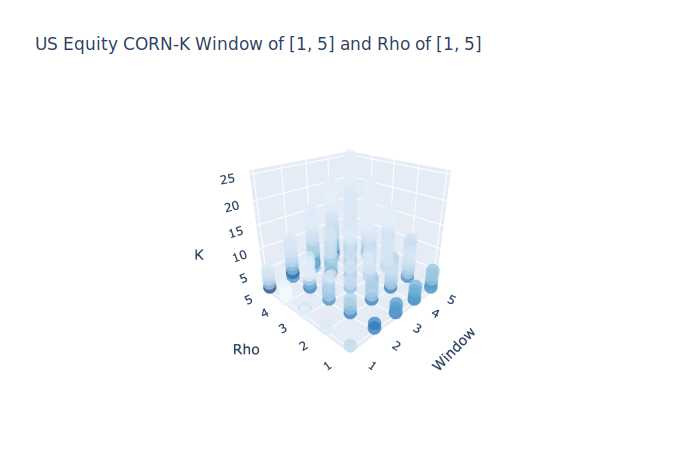

In [400]:
plot_k(equity_cornk, "US Equity CORN-K Window of [1, 5] and Rho of [1, 5]")

In [177]:
# US Equity CORN-K with highest returns.
equity_cornk_ = CORNK(window=2, rho=5, k=2)
equity_cornk_.allocate(us_equity, verbose=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


CORN-K provides a similar analysis as CORN with a window of 2 and rho of 1 having the highest returns. Based on the darkness of the circles for all rho values of 1, we can also notice that most parameters with k values of 1 had significant returns.

### SCORN

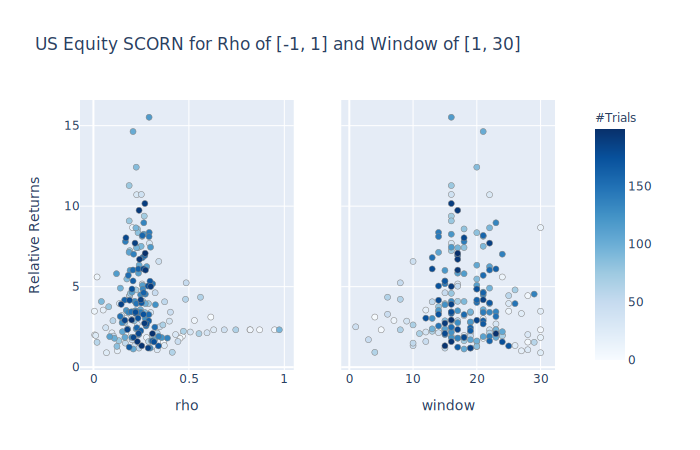

In [402]:
# US Equity SCORN
fig = optuna.visualization.plot_slice(equity_scorn)
fig.update_layout(title_text="US Equity SCORN for Rho of [-1, 1] and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

There is less of a distinct pattern for SCORN. Rho of 0.2 is similar to MSCI but different from the other datasets. The window range is also much longer with a value closer to 16 being optimal. From the initial look, a more rigorous analysis should be required to determine the parameters and apply this strategy in a real trading environment.

### SCORN-K

In [139]:
# Pickled study for US Equity SCORN-K with different parameters.
with open('pickled/equity_scornk.pickle', 'rb') as fout:
    equity_scornk = pickle.load(fout)
equity_scornk = pd.DataFrame(equity_scornk, columns=['Window','Rho','K','Returns']).sort_values('Returns', ascending=False)

In [140]:
equity_scornk.head()

Window  Rho    K    Returns
16      2.0  1.0  2.0  10.153985
130     4.0  5.0  1.0  10.013314
46      3.0  1.0  2.0   9.929112
151     5.0  1.0  2.0   8.990811
18      2.0  2.0  2.0   8.977606

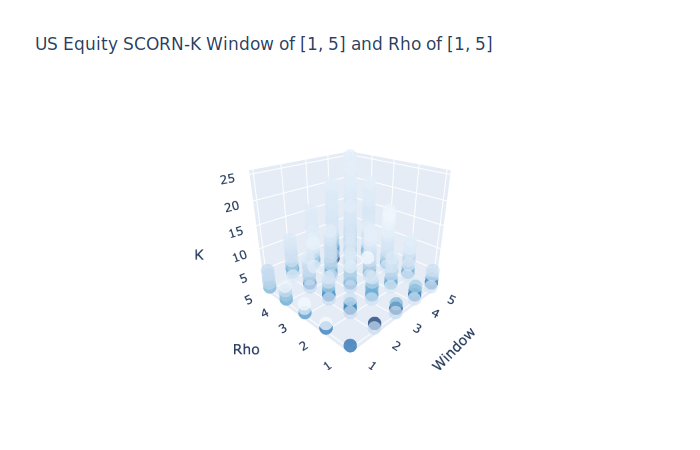

In [401]:
plot_k(equity_scornk, "US Equity SCORN-K Window of [1, 5] and Rho of [1, 5]")

In [142]:
# US Equity SCORN-K with highest returns.
equity_scornk_ = SCORNK(window=2, rho=1, k=2)
equity_scornk_.allocate(us_equity, verbose=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


The results for SCORN-K unfortunately do not mean much as we examined from SCORN that the optimal window is around 16, which is not covered in this range of values. The most important note from this graph is that k must be either 1 or 2 to have the highest returns for any ensemble of portfolios.

### FCORN

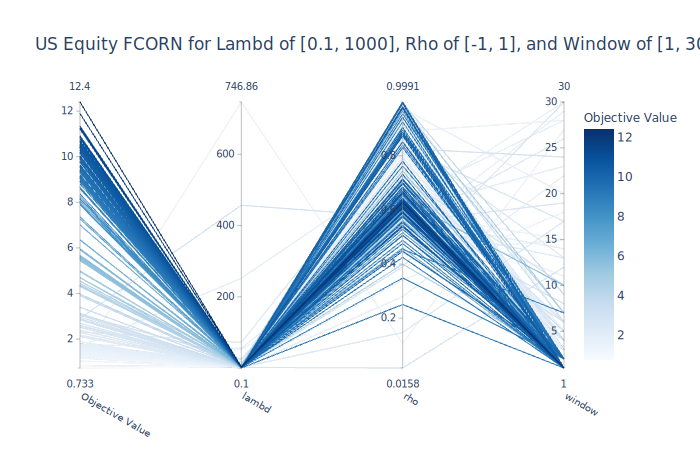

In [403]:
# US Equity FCORN
fig = optuna.visualization.plot_parallel_coordinate(equity_fcorn)
fig.update_layout(title_text="US Equity FCORN for Lambd of [0.1, 1000], Rho of [-1, 1], and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

The graph for FCORN indicates a more robust strategy to exact parameters. A low value of lambd continues to produce high returns along with a wide range of rho from 0.6 to 1, and a window of either 1 or 2 had the highest returns, which is in fact different from the previously suggested values of CORN and SCORN for US Equity.

### FCORN-K

In [146]:
# US Equity FCORN-K with highest returns.
equity_fcornk = FCORNK(window=2, rho=1, lambd=1, k=2)
equity_fcornk.allocate(us_equity, verbose=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [148]:
# Buy and Hold.
equity_bah = BAH()
equity_bah.allocate(us_equity)

# Constant Rebalanced Portfolio.
equity_crp = CRP()
equity_crp.allocate(us_equity)

In [149]:
# CORN.
equity_corn_ = CORN(window=equity_corn.best_params['window'], rho=equity_corn.best_params['rho'])

# CORN-U.
equity_cornu_ = CORNU(window=equity_cornu.best_params['window'], rho=equity_cornu.best_params['rho'])

# SCORN.
equity_scorn_ = SCORN(window=equity_scorn.best_params['window'], rho=equity_scorn.best_params['rho'])

# FCORN.
equity_fcorn_ = FCORN(window=equity_fcorn.best_params['window'], rho=equity_fcorn.best_params['rho'], lambd=equity_fcorn.best_params['lambd'])

In [150]:
# Allocate weights.
equity_corn_.allocate(us_equity)
equity_cornu_.allocate(us_equity)
equity_scorn_.allocate(us_equity)
equity_fcorn_.allocate(us_equity)

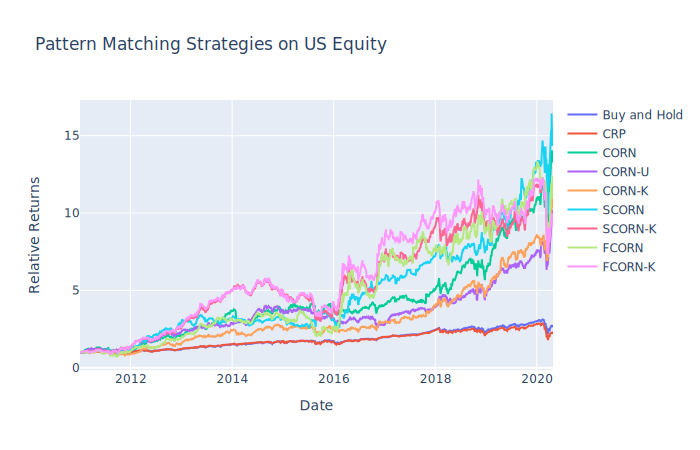

In [404]:
fig = go.Figure()
idx = equity_bah.portfolio_return.index
fig.add_trace(go.Scatter(x=idx, y=equity_bah.portfolio_return['Returns'], name="Buy and Hold"))
fig.add_trace(go.Scatter(x=idx, y=equity_crp.portfolio_return['Returns'], name="CRP"))
fig.add_trace(go.Scatter(x=idx, y=equity_corn_.portfolio_return['Returns'], name="CORN"))
fig.add_trace(go.Scatter(x=idx, y=equity_cornu_.portfolio_return['Returns'], name="CORN-U"))
fig.add_trace(go.Scatter(x=idx, y=equity_cornk_.portfolio_return['Returns'], name="CORN-K"))
fig.add_trace(go.Scatter(x=idx, y=equity_scorn_.portfolio_return['Returns'], name="SCORN"))
fig.add_trace(go.Scatter(x=idx, y=equity_scornk_.portfolio_return['Returns'], name="SCORN-K"))
fig.add_trace(go.Scatter(x=idx, y=equity_fcorn_.portfolio_return['Returns'], name="FCORN"))
fig.add_trace(go.Scatter(x=idx, y=equity_fcornk.portfolio_return['Returns'], name="FCORN-K"))

fig.update_layout(title='Pattern Matching Strategies on US Equity', xaxis_title='Date', yaxis_title='Relative Returns')
fig.show()

This US Equity dataset includes the recent downturn from COVID-19. Particularly, SCORN has its returns drop from 14 to 9 initially but regains its value back to 16. This is actually higher than the returns before the crash. Exact portfolio weights should be examined to determine the logic and pathway of the portfolio selection method, but these results indicate a possibility of applying pattern-matching strategies in a real trading environment.

## Conclusion

Pattern matching strategies can be formulated in numerous ways with different thresholds and parameters. The original CORN development by Li, Hoi, and Gopalkrishnan was further improved with studies from Yang Wang and Dong Wang. This notebook covered a wide range of CORN strategies employed in MlFinLab’s newest Online Portfolio Selection module, and readers will be able to replicate results using the simple methods of the new module.

If you enjoyed reading this please remember to leave us a star on [GitHub](https://github.com/hudson-and-thames) and become a sponsor on [Patreon](https://www.patreon.com/HudsonThames) to have exclusive access to our Slack channel!

- Reference 1: [Online Portfolio Selection](https://books.google.com/books/about/Online_Portfolio_Selection.html?id=R2fdCgAAQBAJ)
- Reference 2: [CORN: Correlation-Driven Nonparametric Learning Approach for Portfolio Selection](https://ink.library.smu.edu.sg/cgi/viewcontent.cgi?article=3265&context=sis_research)
- Reference 3: [Market Symmetry and Its Application to Pattern-Matching-Based Portfolio Selection](https://jfds.pm-research.com/content/1/2/78.short)